In [64]:
import numpy as np
import matplotlib.pyplot as mp
import os
from matplotlib.image import imread

# for image folder
folder_path = './imgData/'
image_size = (256,256) 
num_images = 25

# initialize the data matrix
x = np.zeros((image_size[0] * image_size[1], num_images))

# load images one by one
for i in range(num_images):
    img = imread(os.path.join(folder_path, f"face_{i}.png"))
    img_vector = img.flatten() # convert 2d to 1d column vector
    x[:, i] = img_vector    # This is the numpy slicing, it means take all the rows and ith column, i.e. in ith iteration the respective image will be flattened and places in the ith column.

print('shape of X (data matrix): ', x.shape)


shape of X (data matrix):  (65536, 25)


> data matrix X is shaped (65536, 25)
> Each column is a flattened image.
> Each row is the intensity of one particular pixel across all 25 images.


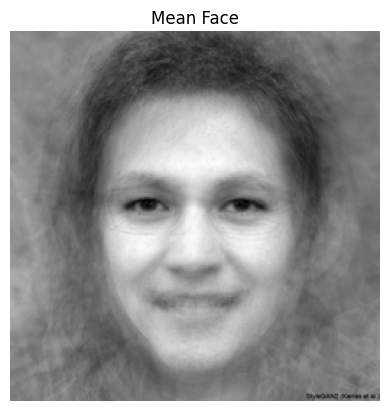

In [65]:
# initializing the mean vector
mean = np.zeros((image_size[0] * image_size[1], 1))

# calculating and filling the mean vector

# for i in range(x.shape[0]):   # not the best way
#     mean[i,0] = np.mean(x[i,:])

mean = np.mean(x, axis=1, keepdims=True)  # shape: (65536, 1)
# keepdims keeps shape as (65536, 1) instead of squashing it into (65536,), which is almost no difference unless some manual operation where the latter may cause some bugs

# get the X_centered from x

x_centered = np.zeros((image_size[0] * image_size[1], num_images))

for i in range(num_images):
   x_centered[:, i] = x[:, i] - mean[:, 0]




# # This is just to see what the image has been in mean as a demo only, nothing to do with the process
mp.imshow(mean.reshape(image_size), cmap='gray')    # it reshapes the 1D 'mean' into dimention of 'image_size' into grayscal
mp.title("Mean Face")
mp.axis('off')
mp.show()

# # to see what one single image has become
# Original image
# mp.imshow(x[:, 0].reshape(image_size), cmap='gray')
# mp.title("Original Image")
# mp.show()

# # Centered image
# mp.imshow(x_centered[:, 0].reshape(image_size), cmap='gray')
# mp.title("Centered Image")
# mp.show()



In [66]:
# calculating covariance matrix

# Step 4: Calculate the Covariance Matrix

n = num_images  # number of samples

# Using the dual PCA trick: C_x = (1 / (n − 1)) * X_centered.T @ X_centered
c_x = (1 / (n - 1)) * (x_centered.T @ x_centered)

print("Covariance matrix shape:", c_x.shape)


Covariance matrix shape: (25, 25)


In [67]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(c_x)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # [::-1] - Python slice notation that reverses the array, changing ascending order to descending order (largest to smallest)
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)


Eigenvalues shape: (25,)
Eigenvectors shape: (25, 25)


In [73]:
# sorting and selecting the top k eigenvectors

# Select top k eigenvectors
k = 24
w_small = eigenvectors_sorted[:, :k]  # shape: (25, k)
print('Shape of w_small (dual space):', w_small.shape)


x_projected = x_centered @ w_small # by tut
print('Shape of x_projected:', x_projected.shape)




Shape of w_small (dual space): (25, 24)
Shape of x_projected: (65536, 24)


In [ ]:
# to peoject back onto original pixel space to get the eigenfaces


x_reconstructed = x_projected @ w_small.T + mean
print('Shape of x_reconstructed:', x_reconstructed.shape)


Shape of x_reconstructed: (65536, 25)


In [77]:
# reconstruction error

from numpy.linalg import norm

reconstruction_error = norm(x - x_reconstructed, 'fro')
print("reconstruction error (frobenius norm): ", reconstruction_error)



reconstruction error (frobenius norm):  1.1240997022950636e-12


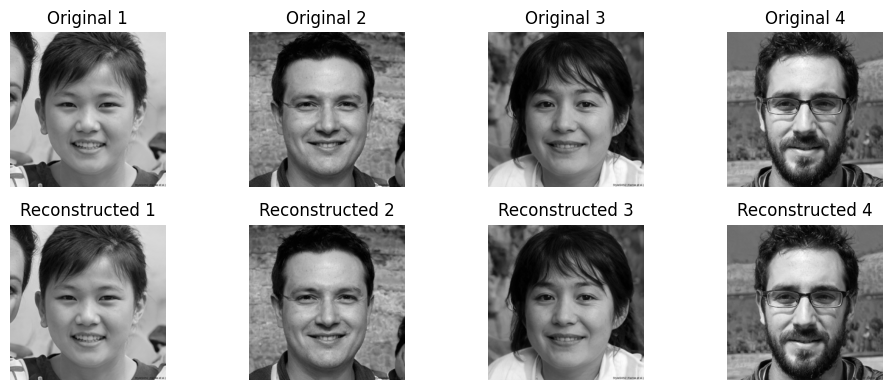

In [78]:
# visualize original vs reconstructed (first 4) images

num_show = 4
mp.figure(figsize=(10,4))

for i in range(num_show):
    # Original image
    mp.subplot(2, num_show, i + 1)
    mp.imshow(x[:, i].reshape(image_size), cmap='gray')
    mp.title(f'Original {i+1}')
    mp.axis('off')

    # Reconstructed image  
    mp.subplot(2, num_show, i + 1 + num_show)
    mp.imshow(x_reconstructed[:, i].reshape(image_size), cmap='gray')  # Fixed: use i instead of 1
    mp.title(f'Reconstructed {i+1}')
    mp.axis('off')

mp.tight_layout()  # Better spacing
mp.show()  # Fixed: added parentheses


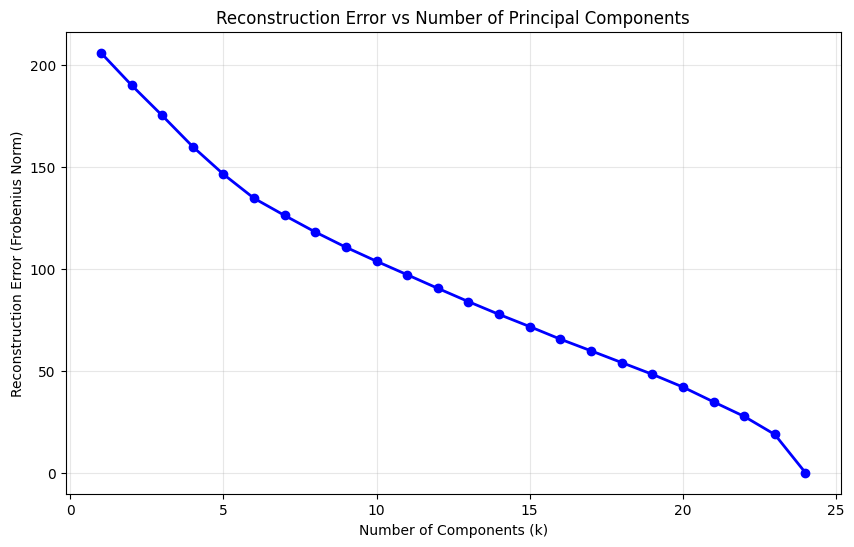

Original data size: 1638400 elements
Current reconstruction error with k = 24:  0.0000
Reconstruction error with k=1: 205.9563
Reconstruction error with k=10: 103.6971
Reconstruction error with k=20: 42.0104
Reconstruction error with k=24: 0.0000


In [79]:
# Compute reconstruction error for different k values
k_values = range(1, 25)  # Test k from 1 to 24 (max possible for 25 images)
errors = []

for k_test in k_values:
    # Select top k eigenvectors
    w_test = eigenvectors_sorted[:, :k_test]
    
    # Project data onto k-dimensional subspace
    x_proj_test = x_centered @ w_test
    
    # Reconstruct data
    x_recon_test = x_proj_test @ w_test.T + mean
    
    # Compute reconstruction error using Frobenius norm
    error_test = norm(x - x_recon_test, 'fro')
    errors.append(error_test)

# Plot reconstruction error versus number of components
mp.figure(figsize=(10, 6))
mp.plot(k_values, errors, 'b-o', linewidth=2, markersize=6)
mp.xlabel('Number of Components (k)')
mp.ylabel('Reconstruction Error (Frobenius Norm)')
mp.title('Reconstruction Error vs Number of Principal Components')
mp.grid(True, alpha=0.3)
mp.show()

# Print some key values
print(f"Original data size: {x.shape[0] * x.shape[1]} elements")
print(f"Current reconstruction error with k = {k}:  {errors[k-1]:.4f}")
print(f"Reconstruction error with k=1: {errors[0]:.4f}")
print(f"Reconstruction error with k=10: {errors[9]:.4f}")
print(f"Reconstruction error with k=20: {errors[19]:.4f}")
print(f"Reconstruction error with k=24: {errors[23]:.4f}")